<a href="https://colab.research.google.com/github/ugoiannacchero/BFG-unimi/blob/main/StructuralBioinformatics/Protein_Structure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 2

# Protein Structure Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_path='/content/drive/MyDrive/Colab_Notebooks/Task_2'   # PASTE YOUR LOCAL PATH IN PLACE OF /content

In [ ]:
#Install conda using the new conda-colab library
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()

⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:21
🔁 Restarting kernel...


In this notebook you will try to characterize one protein from its sequence using multiple tools. In particular we will work on proteins from Salmonella Arizonae that is a Gram Negative bacterium. We will perform

1.   Secondary Structure prediction
2.   Homology modelling
3.   Coevolution analysis
4.   Ab initio structure prediction

You should write a report including the obtained results also using what you learned about structure visualisation using VMD.

Here you can find a very comprehensive paper about the evolution of structure predicition techniques

https://www.dropbox.com/s/l7roge3y8acxxmp/PIIS0021925821006700.pdf?dl=0




As for the last time, link your google drive, create a folder for this second task and save a copy of this notebook there

Then move to your local folder:

Now you can choose one among these sequences on which you will work. To choose it set the seq variable in the following:

*   A9MHP5: Beta-barrel assembly-enhancing protease
*   A9MI44: Uncharacterized protein
*   A9MJ84: Uncharacterized protein
*   A9MG92: ABC transmembrane type-1 domain-containing protein

You can learn more about these proteins checking them on www.uniprot.org


In [ ]:
# XXX is the protein you choose
seq='A9MJ84.fasta'

In [ ]:
#get the sequence you choose as:
!wget https://www.uniprot.org/uniprot/{seq}

--2022-02-17 20:36:47--  https://www.uniprot.org/uniprot/A9MJ84.fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 619 [text/plain]
Saving to: ‘A9MJ84.fasta’

A9MJ84.fasta        100%[===================>]     619  --.-KB/s    in 0s      

2022-02-17 20:36:47 (58.6 MB/s) - ‘A9MJ84.fasta’ saved [619/619]



In [ ]:
#Installing biopython using pip
!pip install biopython

     |████████████████████████████████| 2.3 MB 7.7 MB/s 
     |████████████████████████████████| 15.7 MB 46.3 MB/s 


Biopython is an excellent companion for working with DNA and protein sequences and also with structures. Here, we will show how to use it for reading a protein sequence file.


In [ ]:
import os
from pathlib import Path
from Bio import SeqIO, Entrez
# read your protein sequence
aaseq = SeqIO.read(seq, format="fasta")

What is great about SeqIO is that you can use it to manipulate your sequence (e.g. sorting, changing formats, etc) and also to print information about your sequence, such as its description, sequence and accession ID.
You can try these commands below by first writing "aaseq." and then selecting one of the autocomplete options suggested by Google Colab. With this information, try to obtain the information requested below.

In [ ]:
#Printing the number of amino acids as an example
print("Sequence length (aa):")
print(len(aaseq))

Sequence length (aa):
463


In [ ]:
#Printing the description of the sequence
print("The description of the sequence is:")
#INSERT YOUR OWN COMMAND BELOW (aaseq.xxx)
print(aaseq.description)

#Printing the accession ID of the sequence
print("The ID of the sequence is:")
#INSERT YOUR OWN COMMAND BELOW
print(aaseq.id)

#Printing the sequence
print("The sequence is:")
#INSERT YOUR OWN COMMAND BELOW
print(aaseq.seq)

The description of the sequence is:
tr|A9MJ84|A9MJ84_SALAR Uncharacterized protein OS=Salmonella arizonae (strain ATCC BAA-731 / CDC346-86 / RSK2980) OX=41514 GN=SARI_00558 PE=4 SV=1
The ID of the sequence is:
tr|A9MJ84|A9MJ84_SALAR
The sequence is:
MFILETLNFVVDILKVPSVLVGLIALIGLVAQKKAFSDVVKGTIKTILGFIVLGGGATVLVGSLNPLGGMFEHAFNIQGIIPNNEAIVSIALEKYGASTALIMAFGMVANIVVARFTRLKYIFLTGHHTFYMACMIGVILTVAGFEGVGLVFTGSLILGLVMAFFPALAQRYMRQITGTDDIAFGHFGTLGYVLSGWIGSLCGKGSRSTEEMNLPKNLSFLRDSSISISLTMMIIYLIMAVSAGRDYVEATFSGGQNYLVYAIIMAITFAAGVFIILQGVRLILAEIVPAFTGFSEKLVPNARPALDCPVVYPYAPNAVLIGFLFSFLGGLVGLFLLGQMKLVLILPGVVPHFFTGATAGVFGNATGGRRGAMIGAFANGLLITFLPVLLLPVLGAIGFANTTFSDADFGAIGILLGNLARYLSPMAITGLVVALFALLVAYNVLAKNKKANAEVQENSGAKE


# Secondary Structure Prediction

Now we can begin with a secondary structure prediction from the sequence. For this we will use S4PRED (https://github.com/psipred/s4pred)

In [ ]:
%cd {local_path}/s4pred

[Errno 2] No such file or directory: '{local_path}/s4pred'
/content


In [ ]:
# we need to download and install s4pred
!git clone --depth 1 https://github.com/psipred/s4pred
%cd s4pred
%mkdir weights
%cd weights
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_1.pt
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_2.pt
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_3.pt
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_4.pt
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_5.pt

Cloning into 's4pred'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.
/content/s4pred
/content/s4pred/weights
--2022-02-17 20:37:38--  http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_1.pt
Resolving bioinfadmin.cs.ucl.ac.uk (bioinfadmin.cs.ucl.ac.uk)... 128.16.10.201
Connecting to bioinfadmin.cs.ucl.ac.uk (bioinfadmin.cs.ucl.ac.uk)|128.16.10.201|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89748500 (86M)
Saving to: ‘weights_1.pt’

weights_1.pt        100%[===================>]  85.59M  17.7MB/s    in 4.8s    

2022-02-17 20:37:43 (17.7 MB/s) - ‘weights_1.pt’ saved [89748500/89748500]

--2022-02-17 20:37:43--  http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_2.pt
Resolving bioinfadmin.cs.ucl.ac.uk (bioinfadmin.cs.ucl.ac.uk)... 128.16.10.201
Connecting to bi

In [ ]:
# Install: PyTorch
# this can be long...
!pip install torch==1.5.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 1.2 kB/s 
     |████████████████████████████████| 829 kB 8.4 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=4cff284f57d1a4d3536782258b0a4669abaa239d20c708b9ff304db238dd7efa
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future


Now we can run the prediction over our fasta sequence and save it in a text file. You can then double click on the file to see the results

In [ ]:
%cd {local_path}
!python s4pred/run_model.py {seq} > ss.{seq}.txt
%ls ss.{seq}.txt

/content/drive/MyDrive/Colab_Notebooks/Task_2
ss.A9MJ84.fasta.txt


The ss.A9MJ84.fasta.txt can be either be seen by using a text editor or by using the cat command.

In [ ]:
!cat ss.A9MJ84.fasta.txt

# PSIPRED VFORMAT (S4PRED V1.0)

   1 M C   1.000  0.000  0.000
   2 F C   0.919  0.079  0.002
   3 I H   0.418  0.575  0.007
   4 L H   0.264  0.727  0.008
   5 E H   0.275  0.718  0.007
   6 T H   0.221  0.774  0.005
   7 L H   0.194  0.803  0.003
   8 N H   0.165  0.833  0.001
   9 F H   0.102  0.896  0.002
  10 V H   0.084  0.914  0.002
  11 V H   0.090  0.908  0.002
  12 D H   0.116  0.883  0.002
  13 I H   0.107  0.892  0.001
  14 L H   0.379  0.621  0.000
  15 K H   0.473  0.527  0.000
  16 V C   0.549  0.451  0.000
  17 P H   0.223  0.777  0.000
  18 S H   0.054  0.946  0.000
  19 V H   0.014  0.986  0.000
  20 L H   0.007  0.993  0.000
  21 V H   0.006  0.994  0.000
  22 G H   0.007  0.993  0.000
  23 L H   0.005  0.995  0.000
  24 I H   0.004  0.996  0.000
  25 A H   0.004  0.995  0.000
  26 L H   0.007  0.993  0.000
  27 I H   0.022  0.977  0.000
  28 G H   0.089  0.911  0.000
  29 L H   0.064  0.935  0.000
  30 V H   0.100  0.900  0.000
  31 A H   0.415  0.585  0.000
  32 Q

The file is made of three columns that report the secondary structure prediction and are COIL/HELIX/EXTENDED, we can now load and plot the results

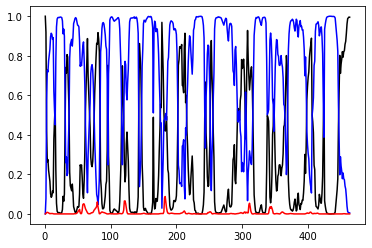

In [ ]:
import pandas as pd
# here we are giving the titles to the columns of the file
header_list = ["position", "sequence", "ss", "coil", "helix","extended"]
# here we are reading the file skipping the first two lines
# you need to set your path to your file
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Task_2/ss.A9MJ84.fasta.txt',sep='\s+',skiprows=2,names=header_list)
data = pd.DataFrame(data)

import matplotlib.pyplot as plt
#we are generating three plots calling each column with its name
#and setting the properties of the plot (e.g. the color of the line)
plt.plot(data['position'], data['coil'], color='black')
plt.plot(data['position'], data['helix'], color='blue')
plt.plot(data['position'], data['extended'], color='red')
#show the plot now
plt.show()

From observing this plot we can inferre that the protein seems to be rich in helix and coil secondary structures with little to no presence of extended regions (there are really small peaks that imply that the possiblity of finding any extended regions are really low).

From this prediction one can assume that the protein taken in consideration is most likely forming Coiled Coils motifs.

# Homology Modelling using Modeller

Then, we must install several pieces of software to perform this tutorial. Namely:
- **MODELLER**, a famous software for template-based modelling.
- **py3Dmol**, for visualization of the template and modelled protein structures.
- **biopython**, for manipulation and retrieval of protein structures and sequences.

After several tests, the following installation instructions are the best way of setting up **Google Colab** for this laboratory session.

1. We will first install MODELLER as follows:

⚠️**WARNING!:** In order to use MODELLER, you will need to obtain an Academic License by registering **[in this website](https://salilab.org/modeller/registration.html)**. The license key will be immediately sent to your email address.

In [ ]:
#ADD YOUR LICENSE KEY HERE!
%env KEY_MODELLER=MODELIRANJE

env: KEY_MODELLER=MODELIRANJE


In [ ]:
!conda config --add channels salilab
!conda install modeller

Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - modeller


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.26 |       h06a4308_2         115 KB
    certifi-2021.10.8          |   py37h06a4308_2         151 KB
    conda-4.11.0               |   py37h06a4308_0        14.4 MB
    hdf5-1106-1.10.6           |                0         3.0 MB  salilab
    modeller-10.1              |   py37h9bf148f_1        16.7 MB  salilab
    openssl-1.1.1m             |       h7f8727e_0         2.5 MB
    ------------------------------------------------------------
                                           Total:        36.9 MB

The following NEW packages will be INSTALLED:

  hdf5-1106          salilab/linux-64::hdf5-1106-1.10.6-0
  modeller           salilab/linux-64::modeller-10.1-py37h9bf148f_1

The fo

In [ ]:
#Installing py3Dmol using pip
!pip install py3Dmol
#And importing the py3Dmol module
import py3Dmol

In [ ]:
%cd {local_path}
%mkdir Homology_Modelling
%cd Homology_Modelling

/content/drive/MyDrive/Colab_Notebooks/Task_2
mkdir: cannot create directory ‘Homology_Modelling’: File exists
/content/drive/MyDrive/Colab_Notebooks/Task_2/Homology_Modelling


In [ ]:
#Downloading pdb_95.pir
!wget https://salilab.org/modeller/downloads/pdb_95.pir.gz
!gunzip pdb_95.pir.gz
#Downloading the build_profile.py script from GitHub
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/scripts/build_profile.py

--2022-02-17 11:51:08--  https://salilab.org/modeller/downloads/pdb_95.pir.gz
Resolving salilab.org (salilab.org)... 169.230.79.19
Connecting to salilab.org (salilab.org)|169.230.79.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17047044 (16M) [application/x-gzip]
Saving to: ‘pdb_95.pir.gz’

pdb_95.pir.gz       100%[===================>]  16.26M  24.7MB/s    in 0.7s    

2022-02-17 11:51:09 (24.7 MB/s) - ‘pdb_95.pir.gz’ saved [17047044/17047044]

--2022-02-17 11:51:10--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/scripts/build_profile.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321 (1.3K) [text/plain]
Saving to: ‘build_profile.py’

build_profile.py    100%[===================>]   1.29K  --.-KB/s    in 0s    

In [ ]:
#copy the fasta file
%cp ../{seq} target.fasta
#Running the build_profile script
!mod10.1 build_profile.py
#Printing only the list of potential templates
!sed -n '/HITS FOUND IN ITERATION:     1/,/Weight Matrix/p;/Weight Matrix/q' build_profile.log

'import site' failed; use -v for traceback
HITS FOUND IN ITERATION:     1


Dynamically allocated memory at     amaxprofile [B,KiB,MiB]:      1286645    1256.489     1.227
> 5zovA                      1    7467   19850     399     463   29.77     0.0           2   379    39   454     5   397
> 4rp8C                      1    7677   24350     430     463   29.25     0.0           3   417    19   451     7   430
> 4rp9A                      1    7678   25850     451     463   28.25     0.0           4   439     9   451     6   451

profile_iteration__> Weight Matrix           [sec]:     0.010000


From the outpot of the above cell it is possible to see a matrix that can be used to determine the best template from this analysis. I've obtained three different templates for my target sequence, which are:

- 5zov
- 4rp8
- 4rp9

In this particular example, a BLOSUM62 similarity matrix is being used for determining the sequence identity between target and potential templates. Also, we are employing only one search iteration and the parameter max_aln_evalue is set to 0.01, indicating that only sequences with e-values smaller than or equal to 0.01 will be included in the final profile.

For simplicity, we just printed out the PDB table from the resulting log file generated during this analysis.
As you can see, several PDB files are indicated.

QUESTION: From this analysis, which template would be better for modeling the structure of our target sequence?

We will choose five PDB structures based on the sequence identity and e-value and select the most appropriate template for our target sequence among them. For this, we will first download these structures using the Bio.PDB command from biopython, and then use the alignment.compare_structures() command to assess the structural and sequence similarity between the possible templates through the compare.py script.
Please take a few minutes to examine the content of this script, particularly i) how are the different protein structures included within the script; and ii) which chain is being used from each structure. This is important for cases where only one of many chains in the PDB corresponds to the protein. Also, please note that there are two alignment steps: first, a sequence alignment; second, a structural alignment.

# Sequence and Structural Alignment

In [ ]:
import os
#Downloading the PDB files using biopython
from Bio.PDB import *
#add here the list of PDB codes above (4 or 5) withouth chain
templates = ['5zov','4rp8','4rp9']
pdbl = PDBList()
for s in templates:
  pdbl.retrieve_pdb_file(s, pdir='.', file_format ="pdb", overwrite=True)
  os.rename("pdb"+s+".ent", s+".pdb")

In [ ]:
#Downloading the build_profile.py script from GitHub
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/scripts/compare.py
#Check this script and change the names of the PDB files if required

--2022-02-17 11:51:35--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/scripts/compare.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469 [text/plain]
Saving to: ‘compare.py’

compare.py          100%[===================>]     469  --.-KB/s    in 0s      

2022-02-17 11:51:35 (11.0 MB/s) - ‘compare.py’ saved [469/469]



Here the alignment of both the structure and the sequene take place thanks to a for cycle in which the alignment() function has been used for:

- adding every structure to the alignment using aln.append_model
- multiple sequence alignment using aln.malign
- superposition of the 3D structure through malign3D
- asses similarity using aln.compare_structures

In [ ]:
from modeller import *

env = environ()
aln = alignment(env)
for (pdb, chain) in (('5zov', 'A'), ('4rp8', 'C'), ('4rp8', 'A'),):

    m = model(env, file=pdb, model_segment=('FIRST:'+chain, 'LAST:'+chain))
    aln.append_model(m, atom_files=pdb, align_codes=pdb+chain)
aln.malign()
aln.malign3d()
aln.compare_structures()
aln.id_table(matrix_file='family.mat')
env.dendrogram(matrix_file='family.mat', cluster_cut=-1.0)


                         MODELLER 10.1, 2021/03/12, r12156

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2021 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Linux 03b1d0a38ed2 5.4.144+ x86_64
Date and time of compilation    

Towards the end you should see something about
**Sequence identity comparison (ID_TABLE):**. This table report about the similarity among the templates. This allows you to understand wheter the suggested templates are redundant or not. The number @xx is the resolution of the experimental structure. In practice one would like the highest coverage, highest sequence similarity and best resolution.

Now, we will align the sequence of our template protein with the sequence of our target protein, such that we can model the structure.
How hard is it? Not at all! Just download the align2d.py script into your working folder, check the script to verify how the sequence of the target and the protein structure are evoked, and execute the script as we have done before

# Template section

The output of the chunk above referred as *Sequence identity comparison (ID_TABLE) allows to understand wheter the suggested templates are redundant or not. Since the protein 5zov presents the highest sequence of similarity of 29.77% (even though sequence identity do not change much between the templates) and a resolution that is acceptable 3.3 A, I decided to use this protein as template to compute the pairwais alignment (align2d) and model the target protein.

Align2d is a dynamic programming algorithm that takes into account 3D structure information about the template for the alignment (for instance, it places gaps on water exposed and curved regions, outside secondary structure segments and between two positions that are close in space).

In [ ]:
%cd {local_path}/Homology_Modelling
from modeller import *

env = Environ()
aln = Alignment(env)
# pdb file and FIRST:CHAIN, LAST:CHAIN this is important for multi-chains
mdl = Model(env, file='5zov', model_segment=('FIRST:A','LAST:A'))
aln.append_model(mdl, align_codes='5zov', atom_files='5zov.pdb')
aln.append(file='target.fasta', align_codes='tr|A9MJ84|A9MJ84_SALAR', alignment_format='FASTA')
aln.align2d()
aln.write(file='aligned.fasta', alignment_format='FASTA')
aln.write(file='aligned.ali', alignment_format='PIR')
aln.write(file='aligned.pap', alignment_format='PAP')

/content/drive/MyDrive/Colab_Notebooks/Task_2/Homology_Modelling
mkapsa__637W> No residue topology library is in memory.
              Better radii would be used if topology.read() is called first.
iup2crm_280W> No topology library in memory or assigning a BLK residue.
              Default CHARMM atom type assigned:  N -->  N
              This message is written only for the first such atom.

Pairwise dynamic programming alignment (ALIGN2D):
  Residue-residue metric   : $(LIB)/as1.sim.mat
  Diagonal                 :          100
  Overhang                 :            0
  Maximal gap length       :       999999
  Local alignment          :            F
  MATRIX_OFFSET (local aln):       0.0000
  FIX_OFFSETS              :      0.0    -1.0    -2.0    -3.0    -4.0
  N_SUBOPT                 :            0
  SUBOPT_OFFSET            :       0.0000
  Alignment block          :            1
  Gap introduction penalty :    -100.0000
  Gap extension penalty    :       0.0000
  Gap diagonal

You will end up with two new files (aligned.ali and aligned.fasta) that contain the pairwise alignment of the target and template sequences. Load the FASTA file into Alignment Viewer 2.0. You can also use our Colab-mounted MSA viewer below:

# Alignment interactive visualization

By running the chunk above I obtained the .fasta file containing the pairwise alignment of the target and the template sequences; to visualize this alignment we need to load them into the Align Viewer 2.0

In [ ]:
#@title Protein MSA Viewer in Google Colab
#The following code is modified from the wonderful viewer developed by Damien Farrell
#https://dmnfarrell.github.io/bioinformatics/bokeh-sequence-aligner

#Importing all modules first
import os, io, random
import string
import numpy as np

from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO, SeqIO

import panel as pn
import panel.widgets as pnw
pn.extension()

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot

#Setting up the amino color code according to Zappo color scheme
def get_colors(seqs):
    #make colors for bases in sequence
    text = [i for s in list(seqs) for i in s]
    #Use Zappo color scheme
    clrs =  {'K':'red',
             'R':'red',
             'H':'red',
             'D':'green',
             'E':'green',
             'Q':'blue',
             'N':'blue',
             'S':'blue',
             'T':'blue',
             'A':'blue',
             'I':'blue',
             'L':'blue',
             'M':'blue',
             'V':'blue',
             'F':'orange',
             'Y':'orange',
             'W':'orange',
             'C':'blue',
             'P':'yellow',
             'G':'orange',
             '-':'white'}
    colors = [clrs[i] for i in text]
    return colors

#Setting up the MSA viewer
def view_alignment(aln, fontsize="9pt", plot_width=800):
    """Bokeh sequence alignment view"""

    #make sequence and id lists from the aln object
    seqs = [rec.seq for rec in (aln)]
    ids = [rec.id for rec in aln]
    text = [i for s in list(seqs) for i in s]
    colors = get_colors(seqs)
    N = len(seqs[0])
    S = len(seqs)
    width = .4

    x = np.arange(1,N+1)
    y = np.arange(0,S,1)
    #creates a 2D grid of coords from the 1D arrays
    xx, yy = np.meshgrid(x, y)
    #flattens the arrays
    gx = xx.ravel()
    gy = yy.flatten()
    #use recty for rect coords with an offset
    recty = gy+.5
    h= 1/S
    #now we can create the ColumnDataSource with all the arrays
    source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, text=text, colors=colors))
    plot_height = len(seqs)*15+50
    x_range = Range1d(0,N+1, bounds='auto')
    if N>100:
        viewlen=100
    else:
        viewlen=N
    #view_range is for the close up view
    view_range = (0,viewlen)
    tools="xpan, xwheel_zoom, reset, save"

    #entire sequence view (no text, with zoom)
    p = figure(title=None, plot_width= plot_width, plot_height=50,
               x_range=x_range, y_range=(0,S), tools=tools,
               min_border=0, toolbar_location='below')
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                 line_color=None, fill_alpha=0.6)
    p.add_glyph(source, rects)
    p.yaxis.visible = False
    p.grid.visible = False

    #sequence text view with ability to scroll along x axis
    p1 = figure(title=None, plot_width=plot_width, plot_height=plot_height,
                x_range=view_range, y_range=ids, tools="xpan,reset",
                min_border=0, toolbar_location='below')#, lod_factor=1)
    glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
                text_font="monospace",text_font_size=fontsize)
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                line_color=None, fill_alpha=0.4)
    p1.add_glyph(source, glyph)
    p1.add_glyph(source, rects)

    p1.grid.visible = False
    p1.xaxis.major_label_text_font_style = "bold"
    p1.yaxis.minor_tick_line_width = 0
    p1.yaxis.major_tick_line_width = 0

    p = gridplot([[p],[p1]], toolbar_location='below')
    return p

#Loading the viewer by indicating the MSA file and format to read
#@markdown Name of the MSA file (including the filetype)
MSAfile = 'aligned.fasta' #@param {type:"string"}
MSAformat = 'fasta' #@param {type:"string"}
aln = AlignIO.read(MSAfile,MSAformat)
p = view_alignment(aln, plot_width=900)
pn.pane.Bokeh(p)

Bokeh(Column)

Once your target and template sequences are aligned, we can finally obtain a structure of your target through comparative modeling. Again, read the script and check how the sequences and structures are called in MODELLER through these scripts. In this case, we are also performing this step on a separate folder.
Please note that 1 model is not enough, as there is an energy function defining the optimal position of atomic coordinates, thus different models will have different energies. Generally, between 50-100 are generated for sufficient evaluation.
💡 HINT: For our example, the generation of 50 models takes around 15 min on Google Colab, whereas 10 models are generated in about 3 min. You can edit the number of models to generate on the model-single.py script.

# Obtaining the model

Starting from the alignment between the template and the target protein we can obtain a reliable model through the use of the AutoModel function. For creating a relaiable 3D structure of the protein we would need to do between 50 and 100 evaluation and select the model with the lowest possible Discrete Optimized Protein Energy and the highest possible GA341 score.

In [ ]:
#Creating a new folder and copying the required files for MODELLER
%cd {local_path}/Homology_Modelling
%mkdir model-single
%cd model-single
%cp ../5zov.pdb .
%cp ../aligned.ali .

/content/drive/MyDrive/Colab_Notebooks/Task_2/Homology_Modelling
mkdir: cannot create directory ‘model-single’: File exists
/content/drive/MyDrive/Colab_Notebooks/Task_2/Homology_Modelling/model-single


In [ ]:
from modeller import *
from modeller.automodel import *
#from modeller import soap_protein_od

env = Environ()
a = AutoModel(env, alnfile='aligned.ali',
              knowns='5zov', sequence='tr|A9MJ84|A9MJ84_SALAR',
              assess_methods=(assess.DOPE,
                              #soap_protein_od.Scorer(),
                              assess.GA341))
a.starting_model = 1
# this is the number of model you will generate (the more the better, but also more time consuming)
a.ending_model = 75
a.make()
# at the end you will have a list of models and scores

Output streaming troncato alle ultime 5000 righe.
   13  11993  19V  20L C   N     151  153  147.10 -108.50  104.91    4.88  -63.50 -129.21   40.96
   13         20L  20L N   CA    153  154  142.88  132.50                  -41.20
   14  11995  21V  22G C   N     166  168 -128.05 -167.20   43.41    0.66   82.20 -149.91   16.14
   14         22G  22G N   CA    168  169  155.86  174.60                    8.50
   15  11996  22G  23L C   N     170  172 -121.51  -63.50   58.16   10.21  -63.50   58.16   10.21
   15         23L  23L N   CA    172  173  -45.32  -41.20                  -41.20
   16  11998  24I  25A C   N     186  188 -140.05 -134.00   32.22    1.67  -62.50  160.44   30.44
   16         25A  25A N   CA    188  189  178.64  147.00                  -40.90
   17  11999  25A  26L C   N     191  193  -80.64  -70.70   30.45    1.98  -63.50  149.40   21.77
   17         26L  26L N   CA    193  194  170.38  141.60                  -41.20
   18  12000  26L  27I C   N     199  201  -63.62 

The output from this process is a bunch of PDB files, each one of them corresponding to a comparative model of our target protein, that are numbered from 1 up to the total number of models requested during comparative modeling.
Also, the log output has the total potential energy for each structure,according to MODELLER’s DOPE (discrete optimized protein energy) score. For simplicity, this script was modified to indicate the model with the best DOPE score. We will be working only with the model with the best score for the remainder of the session.
As an example, our best model during preparation of this tutorial showed the following DOPE score:
```
Top model: target.B99990025.pdb (DOPE score -28735.180)
```

# Visualization of the 3D model

From all the models obtained via using Automodel in the code chunk above I have selected tr|A9MJ84|A9MJ84_SALAR.9999025.pdb having a lowest DOPE score -28735.180 among the models with the highest GA341 score.

In the following code chunk we are using py3Dmol.view togheter with addModel to visualize at the same time the predicted 3D structure of the target protein (blue) overlapped to the one of the template (green).

In [ ]:
%cd {local_path}/Homology_Modelling/model-single
#Copying our best model with a new chain id
!sed "s/ A / B /g" tr\|A9MJ84\|A9MJ84_SALAR.B99990025.pdb > bestmodel.pdb

#Setting up py3Dmol for visualization
view=py3Dmol.view()
#Loading template
view.addModel(open('5zov.pdb', 'r').read(),'pdb')
#Loading best DOPE score model
view.addModel(open('bestmodel.pdb', 'r').read(),'pdb')
#Coloring the structures by chain id
view.setStyle({'cartoon': {'colorscheme':'chain'}})
view.zoomTo()
view.setBackgroundColor('white')
view.show()

/content/drive/MyDrive/Colab_Notebooks/Task_2/Homology_Modelling/model-single


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Structure based scoring strategies

After creation of the Homology model we have to check its stereochemical quality and its comparison to experimentally solved structures. For being able to do that SAVES server employs several structure-based scoring strategies, among them I used:

- VERIFY3D (i.e. compatibility of an atomic 3D model to its 1D sequence when compared tothe energetics of good structures from the PDB).
- ERRAT (i.e. quality of non-bonded interactions of a region when compared to similar regions from highly refined structures).
- PROCHECK (stereochemical and geometrical quality of the model, via Ramachandran plots, sidechain rotamers, etc).

# VERIFY 3D

Determines the compatibility of an atomic model (3D) with its own amino acid sequence (1D) by assigning a structural class based on its location and environment (alpha, beta, loop, polar, non polar etc...) and comparing the results to good structures.

A good model structure should have a 3D-1D score > 0.2 for 80% of the amino acid residues

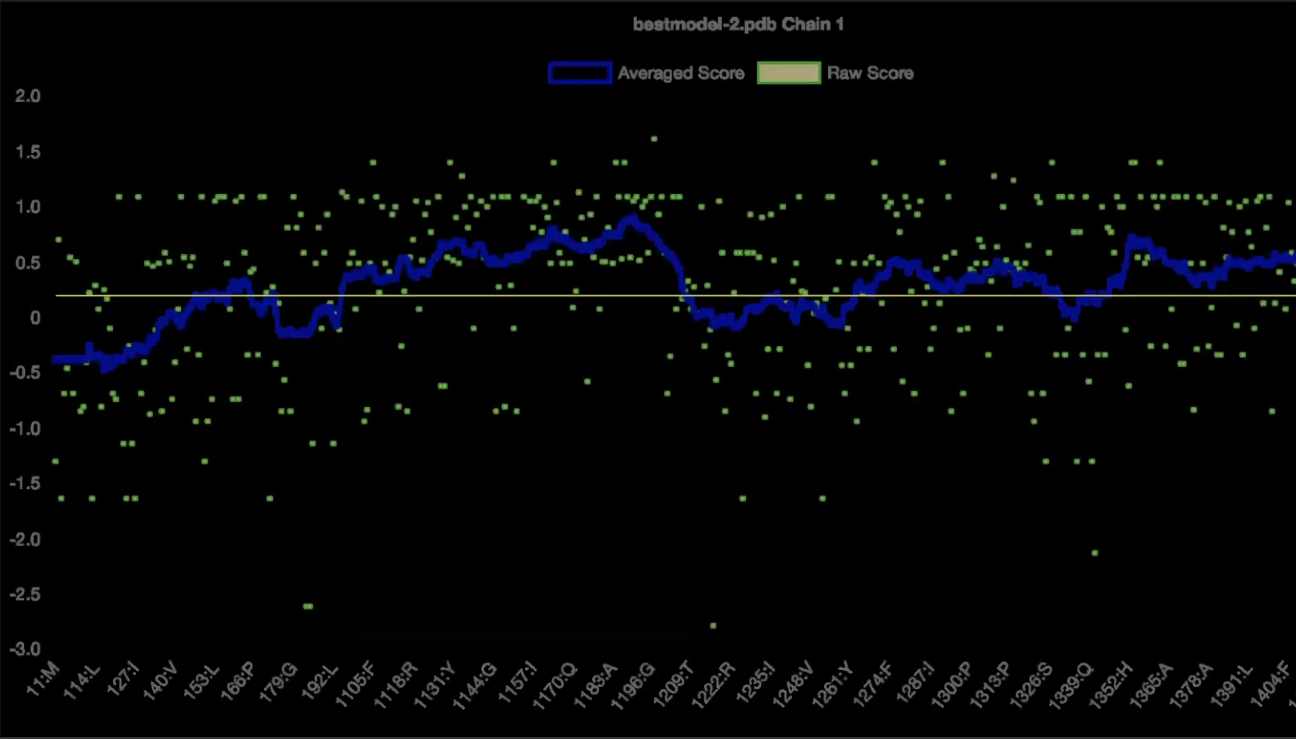

Only the 59.83% of the residues have averaged 3D-1D score > 0.2. By this image is possible to underdtand that residues at the N-terminus, C-terminus and in the middle of the sequence have not a good compatibility with the 3D structure of the model.

# ERRAT

Analyzes the statistics of non-bonded interactions between different atom types and plots the value of the error function versus a 9-residue sliding window, calculated by a comparison with statistics from highly refined structures.

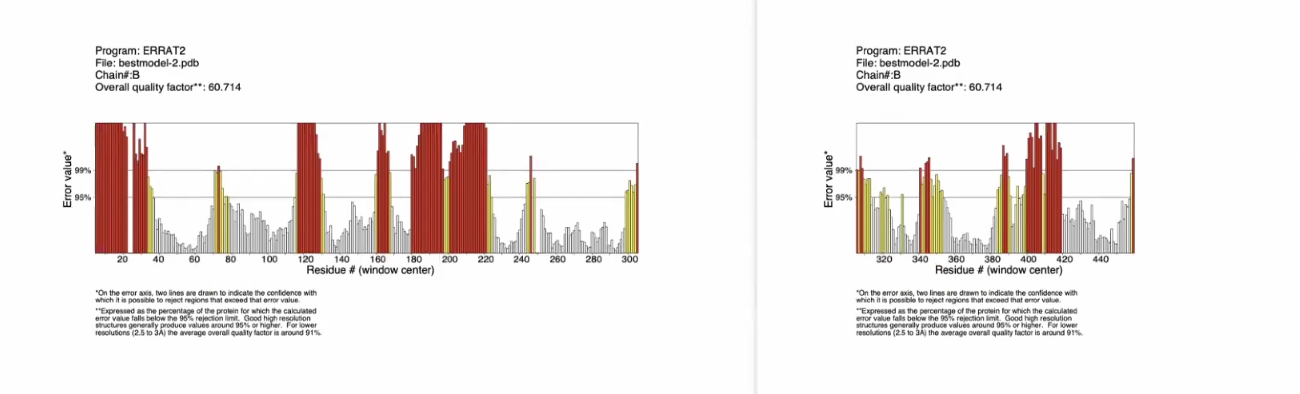

At it is possible to see from the graph, the Overall factor of this model is 60.714 and it represents the percentage of residues where the error value falls below the 95% rejection limit.

Models based on good resolution produce high Overall quality factor.

# PROCHECK

Checks the stereochemical quality of a protein structure by analyzing residue-by-residue geometry and overall structure geometry. Here below Ramachandran plots concerning the structure geometry are presented; in red we can appreciate the residues that fall out of the allowed regions.

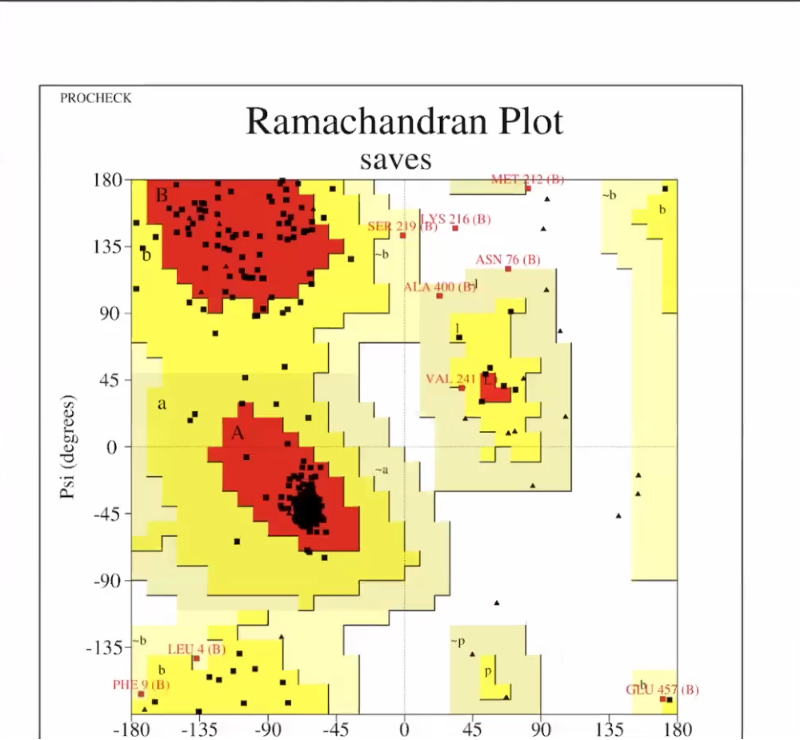

#COEVOLUTION ANALYSIS

To run a coevolution analysis of your selected sequence the easiest option is to paste it https://v2.evcouplings.org

This will take some time (even 1 or more days sometimes) and will then send you an email with the link to see and download your results.

In [ ]:
#Prepare folder for EVcouplings results
%cd {local_path}
%mkdir Coevolution
%cd ./Coevolution

Below I wanted to show the most relevant 3D structure prediciton.

In [ ]:
%cd{local_path}/Coevolution/fold
#Setting up py3Dmol for visualization
view=py3Dmol.view()
#Loading prediction
view.addModel(open('Target_b0.9_9_hMIN.pdb', 'r').read(), 'pdb')
#Coloring the structues by chain id
view.setStyle({'cartoon': {'colorscheme':'chain'}})
view.zoomTo()
view.setBackgroundColor('white')
view.show()

#AB INITIO STRUCTURE PREDICTION


Here you will try to predict your structure using alphafold. Prepare a folder to save your data. Open the google colab at this link
https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb
and save it locally before moving on



Depending on the length of your sequence alphafold can take from 30 minutes to a few hours, be carefull to not close the webpage to avoid to lose the calculation.

Another method used to predict the structure of the target protein is the Ab initio predictions: I used Alphafold, an AI system that predicts a protein's 3D structure from its amino acid sequence. All the results coming from Alpha fold are showed below:

In [ ]:
#Prepare Folder for Alphafold results
%cd {local_path}
%mkdir Abinitio
%cd ./Abinitio

/content/drive/MyDrive/Colab_Notebooks/Task_2
mkdir: cannot create directory ‘Abinitio’: File exists
/content/drive/MyDrive/Colab_Notebooks/Task_2/Abinitio


# Predicted 3D structure

In [ ]:
%cd {local_path}/Abinitio

#First we assign the py3Dmol.view as view
view=py3Dmol.view()
#The following lines are used to add the addModel class
#to read multiple PDB files
view.addModel(open('test_bed77_unrelaxed_rank_1_model_4.pdb', 'r').read(),'pdb')
#Zooming into all visualized structures
view.zoomTo()
#Here we set the background color as white
view.setBackgroundColor('white')
#Here we set the visualization style for chain A and B
view.setStyle({'chain':'B'},{'cartoon': {'color':'purple'}})
view.setStyle({'chain':'C'},{'cartoon': {'color':'yellow'}})
#And we finally visualize the structures using the command below
view.show()

/content/drive/MyDrive/Colab_Notebooks/Task_2/Abinitio


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Here below we an see the predicted model with the highest score (best model among 5 models produced).

# Additional Plots

Together with the predicted 3D structure of the A9MJ84 there are also different plots that come out of the Alphafold pipeline on Google Colab.

The plots we are discussing about are displayed below in the following order:

- Predicted alignment error plot
- Predicted IDDT per position
- Sequence Covering graph

The first and the second plots are referring to the 5 different models with the best score that have been generated, the last graph instead refers to the sequence coverage of the target protein which is the number of amino acids in A9MJ84 sequence that were found in the peptides sequenced.

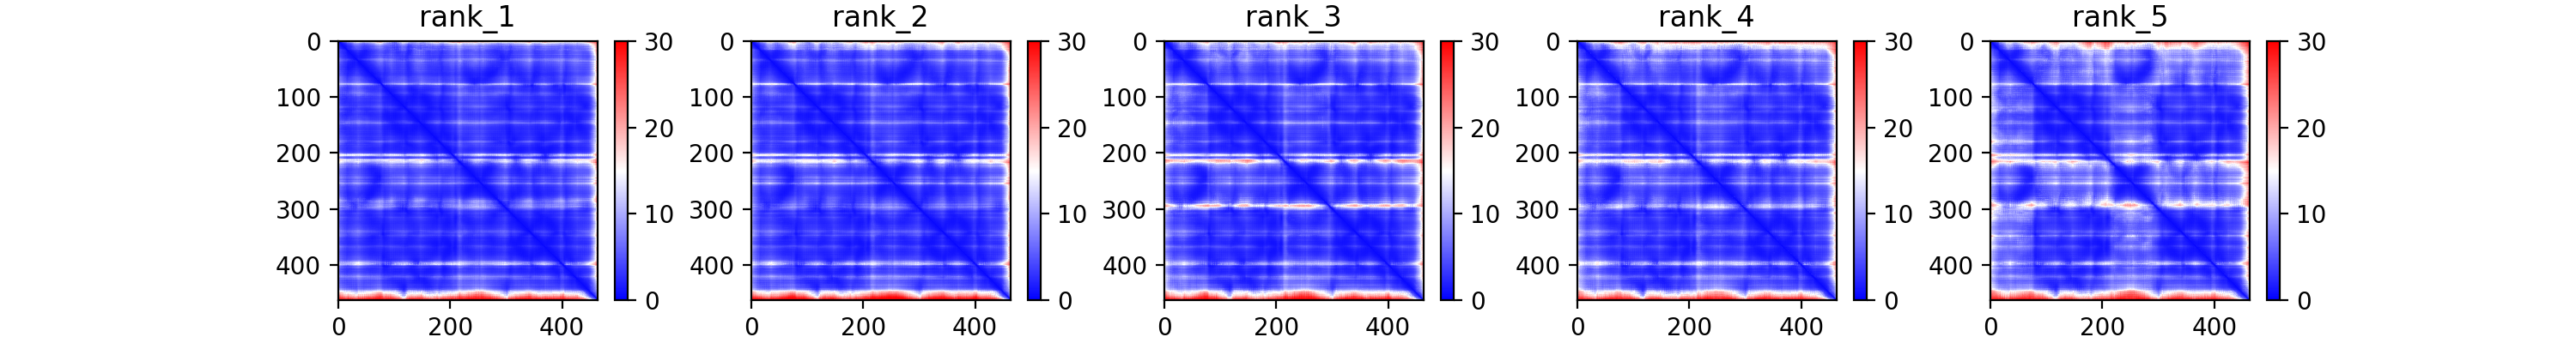

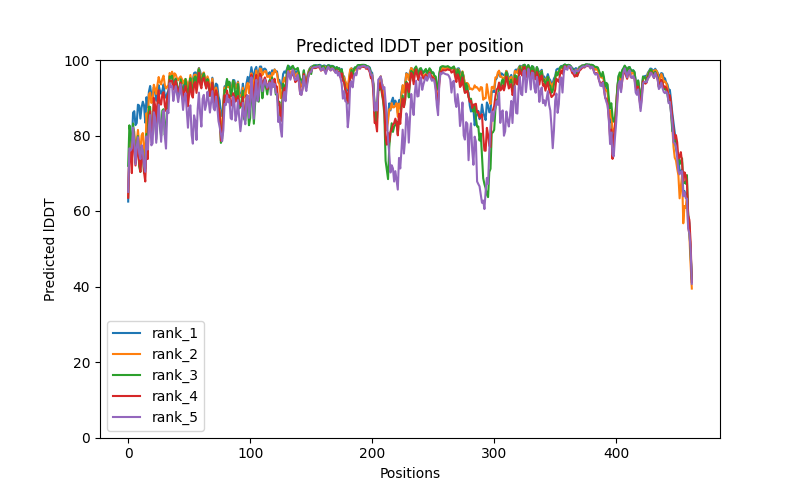

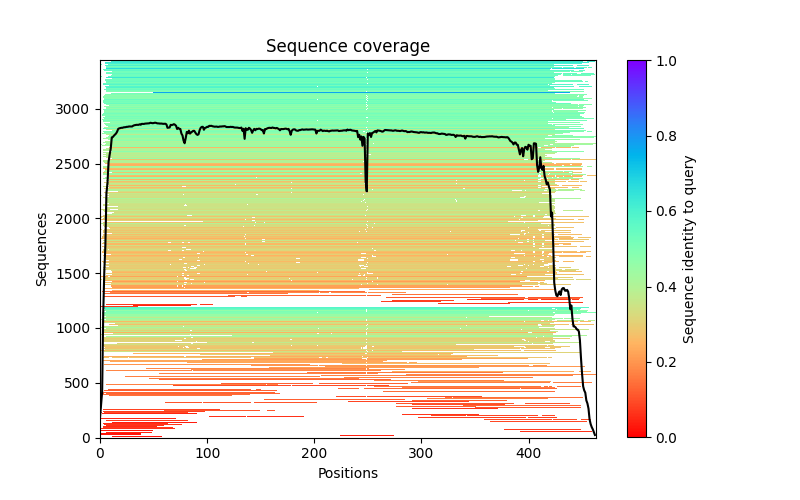

#More analysis

Once you have all the PDB structures obtained using different techniques you can compare them using VMD.
In addition to VMD you can also visualise them directly inside the notebook as in the following example:

Let's visualize some PDBs!

In the following code cell we take a line by line look to the different commands needed to visualize two of the chains that you extracted from 6ANE. Please note that the text inside each parenthesis follows the structure of a JSON data structure which is reviewed in detail here.
Pay special attention to the following py3Dmol classes and what they do: addmodel, setBackground and setStyle.
💡 HINT: The syntax for loading different structures and properties is really straightforward and self explanatory. Even so, remember to be carefull when opening and closing {} and () and using quotes when needed.

If the structures are not overlapped you can use biopython to overlap them

In [ ]:
#The following code was created by Anders Steen Christensen
#from the University of Basel and is available at
#https://gist.github.com/andersx/6354971

import Bio.PDB
import os

# Select what residue numbers you wish to align
# and put them in a list
start_id =  # first res
end_id   =  # last res to be aligned
atoms_to_be_aligned = range(start_id, end_id + 1)

# Start the parser
pdb_parser = Bio.PDB.PDBParser(QUIET = True)

# Get the structures
ref_structure = pdb_parser.get_structure("reference", ".pdb")
sample_structure = pdb_parser.get_structure("sample", ".pdb")

# Use the first model in the pdb-files for alignment
# Change the number 0 if you want to align to another structure
ref_model    = ref_structure[0]
sample_model = sample_structure[0]

# Make a list of the atoms (in the structures) you wish to align.
# In this case we use CA atoms whose index is in the specified range
ref_atoms = []
sample_atoms = []

# Iterate of all chains in the model in order to find all residues
for ref_chain in ref_model:
  # Iterate of all residues in each model in order to find proper atoms
  for ref_res in ref_chain:
    # Check if residue number ( .get_id() ) is in the list
    if ref_res.get_id()[1] in atoms_to_be_aligned:
      # Append CA atom to list
      ref_atoms.append(ref_res['CA'])

# Do the same for the sample structure
for sample_chain in sample_model:
  for sample_res in sample_chain:
    if sample_res.get_id()[1] in atoms_to_be_aligned:
      sample_atoms.append(sample_res['CA'])

# Now we initiate the superimposer:
super_imposer = Bio.PDB.Superimposer()
super_imposer.set_atoms(ref_atoms, sample_atoms)
super_imposer.apply(sample_model.get_atoms())

# Print RMSD:
print('The calculated RMSD is:')
print (str(super_imposer.rms) + ' Å')

# Save the aligned version of one of the chains of 6ANE
io = Bio.PDB.PDBIO()
io.set_structure(sample_structure)
io.save("_aligned.pdb")

After aligment you can reuse the code above for visualisation.

# TEST STUFF (this is not working yet so ignore it)

In [ ]:
pip install tmscoring 'iminuit<2'

In [ ]:
import tmscoring
alignment = tmscoring.TMscoring('/content/drive/MyDrive/Task2/homology/model-single/6ait.pdb', '/content/drive/MyDrive/Task2/homology/model-single/bestmodel.pdb', mode='align', chain_1='A', chain_2='B')

# Find the optimal alignment
alignment.optimise()

# Get the TM score:
alignment.tmscore(**alignment.get_current_values())

# Get the TM local scores:
alignment.tmscore_samples(**alignment.get_current_values())

# RMSD of the protein aligned according to TM score
alignment.rmsd(**alignment.get_current_values())

# Returns the transformation matrix between both structures:
alignment.get_matrix(**alignment.get_current_values())

# Save the aligned files:
alignment.write(outputfile='aligned.pdb', append=True)